In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the adjusted dataset
df = pd.read_csv("premier_league_adjusted.csv")

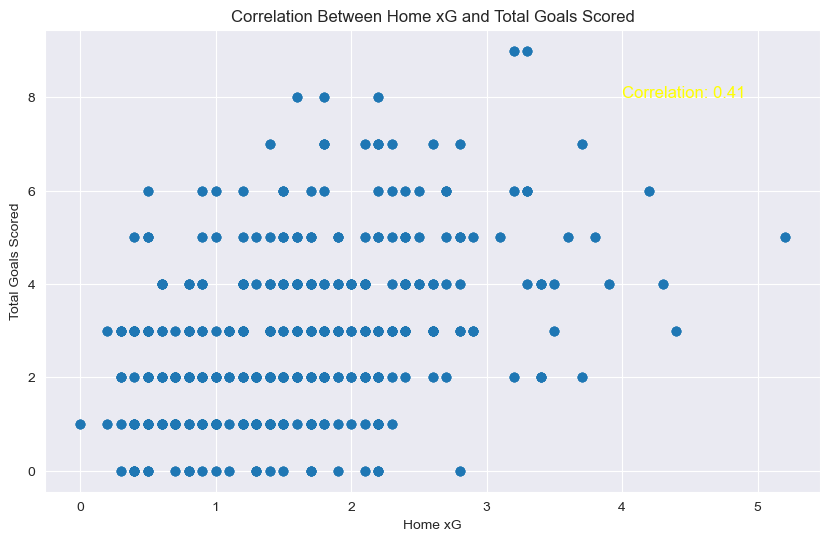

The Pearson correlation coefficient between Home xG and Total Goals Scored is 0.41


In [10]:
# Replace en dash with hyphen in the 'Score' column
df['Score'] = df['Score'].str.replace('–', '-')

# Calculate the total goals scored in each match
df['Home_Score'] = df['Score'].str.split('-').str[0].astype(int)
df['Away_Score'] = df['Score'].str.split('-').str[1].astype(int)
df['Total_Goals'] = df['Home_Score'] + df['Away_Score']

# Calculate the Pearson correlation coefficient between 'Total_Goals' and 'Home_xG'
correlation = df['Total_Goals'].corr(df['Home_xG'])

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['Home_xG'], df['Total_Goals'], alpha=0.7)
plt.title('Correlation Between Home xG and Total Goals Scored')
plt.xlabel('Home xG')
plt.ylabel('Total Goals Scored')
plt.grid(True)

# Add correlation coefficient as text to the plot
plt.text(4, 8, f'Correlation: {correlation:.2f}', fontsize=12, color='yellow')

plt.show()

print(f"The Pearson correlation coefficient between Home xG and Total Goals Scored is {correlation:.2f}")

#### Specific factors (e.g., venue) that significantly affect match outcomes

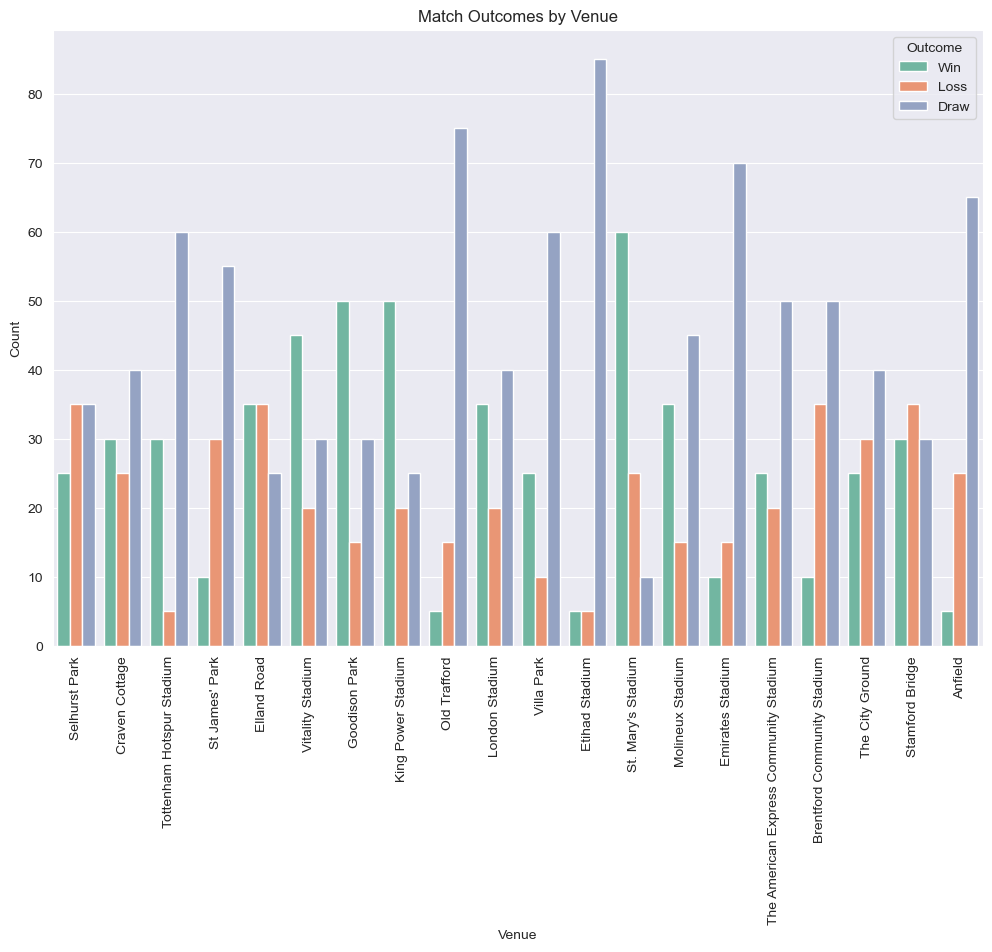

In [21]:
# Replace en dash with hyphen in the 'Score' column
df['Score'] = df['Score'].str.replace('–', '-')

# Calculate match outcomes (Win, Loss, Draw)
def match_outcome(row):
    home_score, away_score = map(int, row['Score'].split('-'))
    if home_score > away_score:
        return 'Win'
    elif home_score < away_score:
        return 'Loss'
    else:
        return 'Draw'

df['Outcome'] = df.apply(match_outcome, axis=1)

# Create a count plot to visualize match outcomes by venue
plt.figure(figsize=(12, 8))
sns.countplot(x='Venue', hue='Outcome', data=df, palette='Set2')
plt.title('Match Outcomes by Venue')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Outcome', loc='upper right', labels=['Win', 'Loss', 'Draw'])
plt.show()